### Tanay Desai

### Research question

 ## My Research question is to primarily Measure and compare relationship between number of episodes the show has and how highly rated the show is.
 
 ## I also try to find many relations between the  Number of Episodes and it's relationship with other given variables.



In [1]:
import pandas as pd
pd.read_csv('../data/raw/anime.csv')


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170,182126,131625,62330,20688,8904,3184,1357,741,1580
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043,49201,49505,22632,5805,1877,577,221,109,379
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229,75651,86142,49432,15376,5838,1965,664,316,533
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182,4806,10128,11618,5709,2920,1083,353,164,131
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312,529,1242,1713,1068,634,265,83,50,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


Firstly, I loaded the dataset and imported the relevant modules.

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


%matplotlib inline

df= pd.read_csv('../data/raw/anime.csv')



## TASK 1

For this task, I prepared the actual and modified dataset I would be using to conduct my EDA. This task was crucial to lay the foundations 
for preparing my dataset.

Following steps I took:

<li> a) Displayed the dataset with it's core features. </li>
<li> b) Removed excess or unimportant data to my Research </li>
<li> c) Changing variable types </li>
<li> d) Created 2 rough visualizations </li> 
 


In [3]:
#Display number of rows and columns
df.info()
df.head()

#Time to remove null values to tidy up the dataset & display dimensions
df=df.dropna(axis=0)
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

(17562, 35)

In [10]:
#Cleaning and removing Unknowns


df=df[df["Score"]!="Unknown"]
df=df[df["Episodes"]!="Unknown"]
df=df[df["Ranked"]!="Unknown"]
df=df[df["Score-10"]!="Unknown"]
df=df[df["Score-5"]!="Unknown"]
df=df[df["Score-1"]!="Unknown"]

df=df[df["Score"]!="null"]
df=df[df["Episodes"]!="null"]
df=df[df["Ranked"]!="null"]
df=df[df["Score-10"]!="null"]
df=df[df["Score-5"]!="null"]
df=df[df["Score-1"]!="null"]


#Changing variable types

df['Score']=df['Score'].astype('float64')
df['Episodes']=df['Episodes'].astype('float64')
df['Ranked']=df['Ranked'].astype('int64')
df['Watching']=df['Watching'].astype('int64')
df['Completed']=df['Completed'].astype('int64')
df['On-Hold']=df['On-Hold'].astype('int64')
df['Dropped']=df['Dropped'].astype('int64')
df['Score-10']=df['Score-10'].astype('int64')
df['Score-5']=df['Score-5'].astype('int64')
df['Score-1']=df['Score-1'].astype('int64')





There were multiple columns that didn't feel like they would fit with my research question. Columns such as:
 <li> -Japanese Name </li>
 <li>-Genres </li>
 <li>-Aired </li>
 <li>-Premiered </li>
 <li>-Studios </li>
 <li>-Licensors </li>
 <li>-Members </li>
 <li>-Favorites </li>
<li> -Duration </li>

They have been excluded from these tasks for the sake of clarity.


Variables I'm most interested in:
<li>-Score </li>
<li>-Type </li>
<li>-Episodes </li>
<li>-Ranked </li>
<li>-Score (10-1) </li>
<li>-Source </li>



There were lots of "Unknown" or similar to null-like values which have been removed. 

In [5]:

# Cleaning relevant variables (I kept only the 100 rankings because there's too many values with a  valid numerical ranking)

df=df[df['Episodes']>0]
df=df[df['Ranked'].between(1,100)]
df=df[df['Watching']>0.00]
df=df[df['Completed']>0.00]
df=df[df['Dropped']>0.00]
df=df[df['On-Hold']>0.00]
df=df[df['Score-10']>0.00]
df=df[df['Score-1']>0.00]

Text(0, 0.5, 'Amount of Episodes')

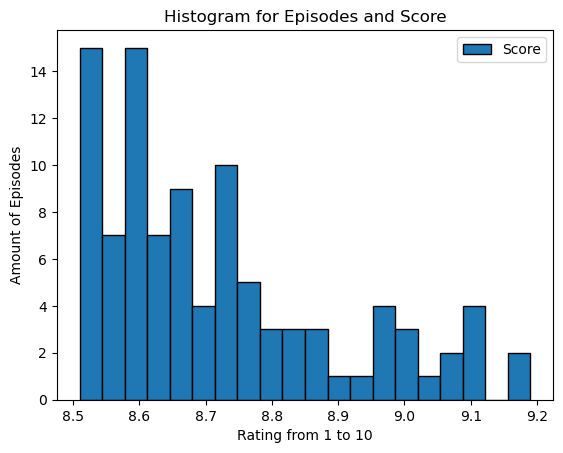

In [6]:
#HISTOGRAM

df.plot(kind= 'hist', x= 'Episodes', y='Score', bins=20, edgecolor="black").set(title="Histogram for Episodes and Score")
plt.xlabel("Rating from 1 to 10")
plt.ylabel("Amount of Episodes")

The histogram displays the message that for a show to have a high user-provided score, it NEEDS to have a substantial amount of Episodes. Notice how the Score escalates till the range of 6-7  and then starts deviating. The peak is 1750+ episodes where the score is around 6.5. 

Theres very few shows with a high (6+) rating that have less amount of episodes. But theres a lot of shows with less than roughly 100 episodes that have a very low score.

[Text(0.5, 1.0, 'Boxplot of Score')]

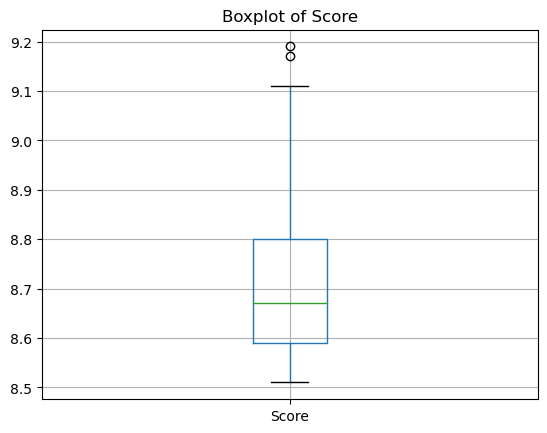

In [7]:
#BOXPLOT FOR SCORE

df.boxplot('Score', grid= 'true').set(title= "Boxplot of Score")




Something that should be questioned in my analysis is "what is the general score people usually give to a show?" , And this simple boxplots answers that.

This boxplot demonstrates that people rarely tend to give a score of 9  or above (notice the Outliers). Surprisingly, There are abundant amount of outliers with low scores around 4 (Minimum). That is proof that more people tend to give a show a very low score (assume below 4) if theyre dissastified with it rather than give a very satisfactory show (assume 9+) a very high score. 

The Median being between 6-7 also shows that even though the scale is from 1-10. People usually do rate a show slightly higher than the middle of the range (which is 5)

#NOTE THAT:

MINIMUM=4
<li> LOW OUTLIERS = Below 4 </li>
<li> LOWER QUARTILE= 6 </li>
<li> MEDIAN= 6 to 7 </li>
<li> UPPER QUARTILE= 7 to 9 </li>
<li> UPPER OUTLIERS = Above 9 </li>
<li> MAXIMUM= 9 </li>





C:\Users\tanna\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Episodes')

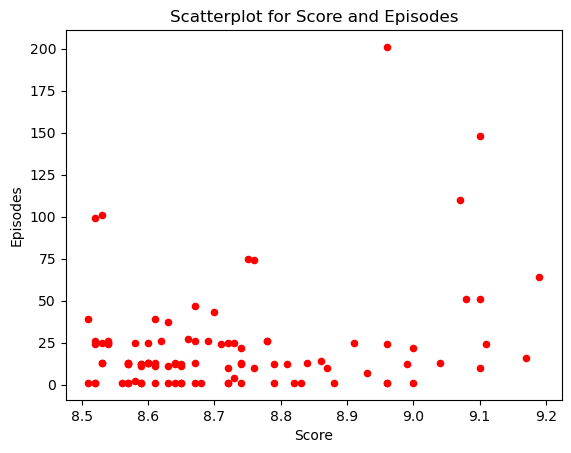

In [8]:

#SCATTER
df.plot(kind='scatter',x='Score', y='Episodes', c="red").set(title="Scatterplot for Score and Episodes")
plt.xlabel('Score')
plt.ylabel('Episodes')


This scatterplot shows a relation between Score and Episodes but in a different way, The scatterplot conveys the same message as the histogram mentioned above but this time its much more easier and different to detect the amount of outliers that stick out. 

However in this plot, we can notice that the shows with 500+ episodes are very rare but they still end up managing a score of atleast 5+. There are shows with comparitively less episodes (below 250) that have a high score (bottom right) but despite those oddities. The trend still remains constant where More Episodes equals a Higher Chance of a good score.



# TASK 2

For task 2, I attempted to do the steps listed for this tasks. These include:

1. Loading the data from the file
2. Cleaning it up by removing outliers
3. Processing it and seeing if new columns can be made or obsolete columns can be removed
4. Wrangling data.


In [11]:
#1-Loading Data

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

df= pd.read_csv('../data/raw/anime.csv')

#2- Cleanup

#Removing null values
df=df.dropna(axis=0)
df.shape

# Setting up condition and unique function
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

#Removing duplicate values if there are any 
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")
    
df.drop_duplicates(inplace=True)

#3- For step 3, I didnt find any columns that needed to be replaced and outliers were dealt with during Step 2 like

#Cleaning and removing Unknowns


df=df[df["Score"]!="Unknown"]
df=df[df["Episodes"]!="Unknown"]
df=df[df["Ranked"]!="Unknown"]
df=df[df["Score-10"]!="Unknown"]
df=df[df["Score-5"]!="Unknown"]
df=df[df["Score-1"]!="Unknown"]

df=df[df["Score"]!="null"]
df=df[df["Episodes"]!="null"]
df=df[df["Ranked"]!="null"]
df=df[df["Score-10"]!="null"]
df=df[df["Score-5"]!="null"]
df=df[df["Score-1"]!="null"]


#Changing variable types

df['Score']=df['Score'].astype('float64')
df['Episodes']=df['Episodes'].astype('float64')
df['Ranked']=df['Ranked'].astype('int64')
df['Watching']=df['Watching'].astype('int64')
df['Completed']=df['Completed'].astype('int64')
df['On-Hold']=df['On-Hold'].astype('int64')
df['Dropped']=df['Dropped'].astype('int64')
df['Score-10']=df['Score-10'].astype('int64')
df['Score-5']=df['Score-5'].astype('int64')
df['Score-1']=df['Score-1'].astype('int64')


#4 For Data Wrangling, Since we have already removed a lot of outliers and uninformative values. Here are the columns along with their data types


df=df[df['Episodes']>0]
df=df[df['Ranked'].between(1,100)]
df=df[df['Watching']>0.00]
df=df[df['Completed']>0.00]
df=df[df['Dropped']>0.00]
df=df[df['On-Hold']>0.00]
df=df[df['Score-10']>0.00]
df=df[df['Score-1']>0.00]









No duplicated entries found


## TASK 3

For this task, I created multiple method chains which I later used to link it the project_function3 file.

In [ ]:
#TASK 3

import pandas as pd
import numpy as np

def load_and_process(url_or_path_to_csv_file):
    
    #Method Chain 1 (Custom columns)
    
    df= pd.read_csv('../data/raw/anime.csv', usecols=['Score','Type','Episodes','Ranked'])

    # Method Chain 2 (Removing null values)

    df1 = (
          pd.read_csv('../data/raw/anime.csv')
          .dropna(axis=0)
          
      )
def duplication():
    
    
(
    
 if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")
    
df.drop_duplicates(inplace=True)
 
      )
    # Method Chain 4 (Removing unimportant data/ Like null and unknown values)
    
    df2= ( df=df[df['Episodes']>0]
df=df[df['Ranked'].between(1,100)]
df=df[df['Watching']>0.00]
df=df[df['Completed']>0.00]
df=df[df['Dropped']>0.00]
df=df[df['On-Hold']>0.00]
df=df[df['Score-10']>0.00]
df=df[df['Score-1']>0.00]
         


         )
    
df2.to_csv('processed3.csv')
    

df2=load_and_process('..data/raw/anime.csv')
    

    

# TASK 4

My research question is as follows: 

"Measure and compare relationship between number of episodes the show has and how highly rated the show is"

I want to draw correlations between seeing if there are shows that dont have a long runtime and still manage to stay popular and high rated by the audience.Main comparisions will be drawn between the score ratings, number of episodes and even popularity.




## VISUALIZATION 1: COMPARING TABLES FOR SCORES AND  AVERAGE EPISODES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('../data/raw/anime.csv')

sns.heatmap(df, cmap='Blues', linecolor='white', linewidth=1)



In [ ]:
#Finding Average of Score & Episodes (SEA) 


So after sorting  the actual dataset

As you can notice between both tables, Most shows with a lot of episodes tend to have a generally high rating but shows with very few episodes have average or below average user submitted scores. This once again proves that the Number of episodes a show has tends to have a heavy impact on the Score it achieves.

# VISUALIZATION 2: HEATMAP

# FILLER CODE (Not important)

In [ ]:
#EDA

                    

    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)
    